In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# seaborn short calls
import copy

def barplot(df, label):
    print(df['OUT'].value_counts())
    
    fig = sns.barplot(x=df[label].value_counts().index, y=df[label].value_counts())
    #return fig


def boxplot(df, label):
    plt.figure(figsize=(15,12))
    df_long = pd.melt(df, id_vars=label)
    
    fig = sns.boxplot(x='variable', y='value', data=df_long, hue=label)
    #return fig


def stripplot(df, label):
    plt.figure(figsize=(15,12))
    df_long = pd.melt(df, id_vars=label)
    
    fig = sns.stripplot(x='variable', y='value', data=df_long, hue=label, jitter=True)
    #return fig


def pairplot(df, label, vars=None):
    if(vars==None):
        vars=list(df.columns.values)
        vars.remove(label)
        
    fig = sns.pairplot(df, hue=label, vars=vars)
    #return fig


def distplots(df_org, label, vars=None):
    # init
    classes = list(map(str,df_org[label].unique()))
    indices = list(range(len(classes)))
    colors = sns.color_palette("husl", len(classes))
    
    # convert labels in df in str (for comparism)
    df = copy.deepcopy(df_org)
    df[label] = df[label].astype(str)
    
    # vars = all column-names without label-name
    if(vars==None):
        vars=list(df.columns.values)
        vars.remove(label)
    
    # plot
    fig, axs = plt.subplots(len(vars), len(classes), figsize=(3*len(classes), 3*len(vars)))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    for col in vars:
        for currentClass in classes:
            df_current = df[df[label] == currentClass]
            x_pos = classes.index(currentClass)
            y_pos = vars.index(col)
            title = "col={} & class={}".format(col, currentClass)
            
            dist = sns.distplot(df_current[col], color=colors[x_pos], ax=axs[y_pos, x_pos])
            dist.set_title(title)
            dist.set_xlabel('')
    
    #return fig

# 1) First Look

In [3]:
df = pd.read_csv('data/sample.csv', sep=";")
df.head()

IN-1  IN-2  IN-3  IN-4  OUT
0     0    14   -28    17    1
1    14   -28   -34   -21    0
2   -28   -34     9   -35    0
3   -34     9    22   -46    0
4     9    22   -18    19    0

 0    2473
 1      22
-1      17
Name: OUT, dtype: int64


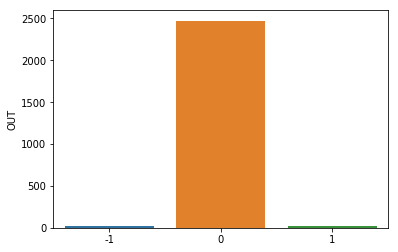

In [4]:
barplot(df, "OUT")

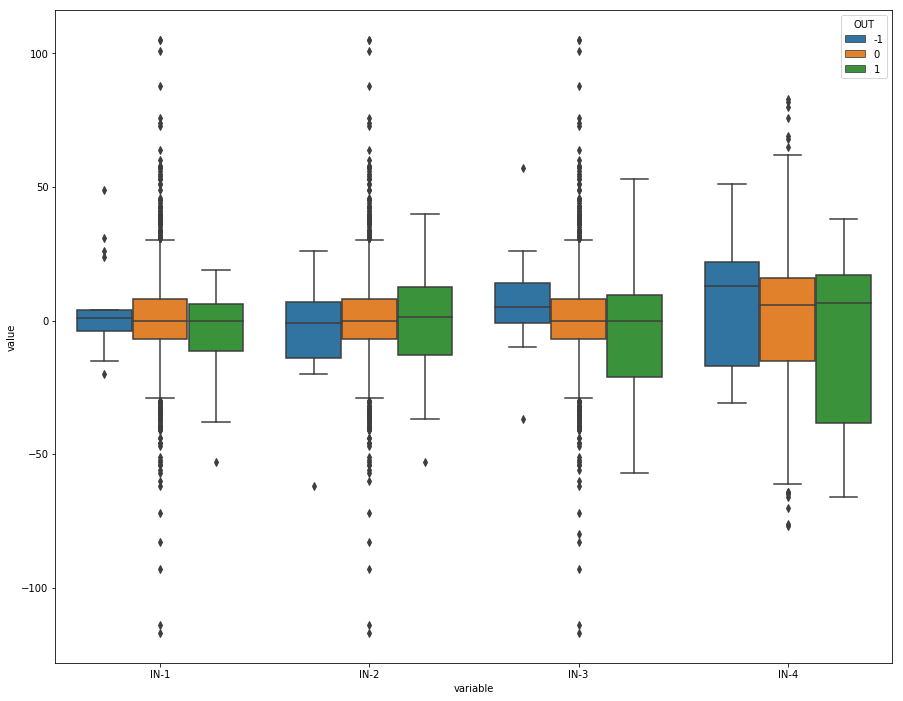

In [5]:
boxplot(df, "OUT")

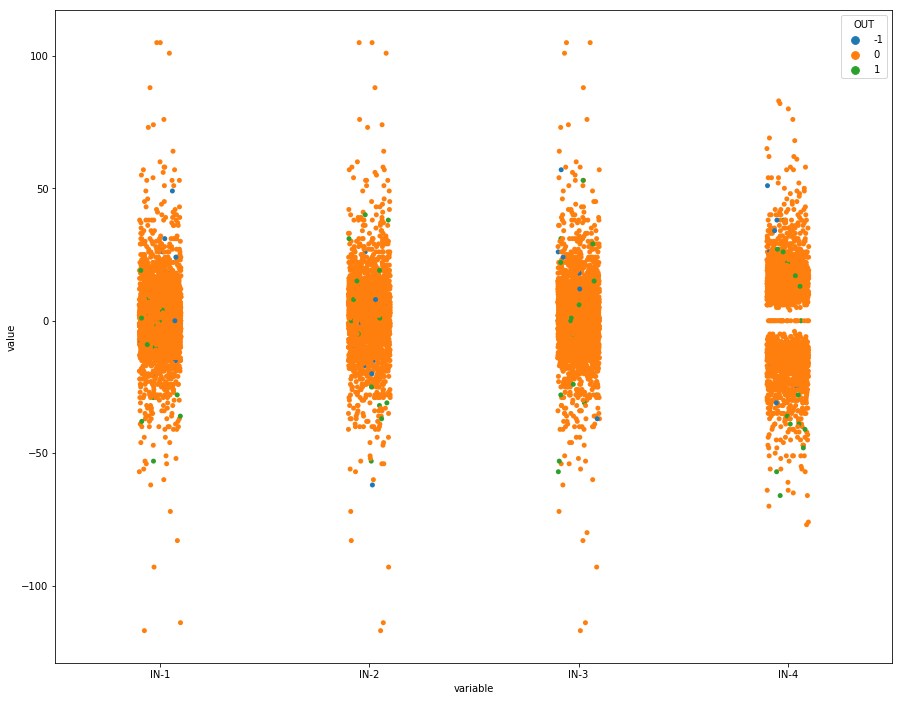

In [6]:
stripplot(df, "OUT")

/home/vagrant/anaconda3/envs/ds/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


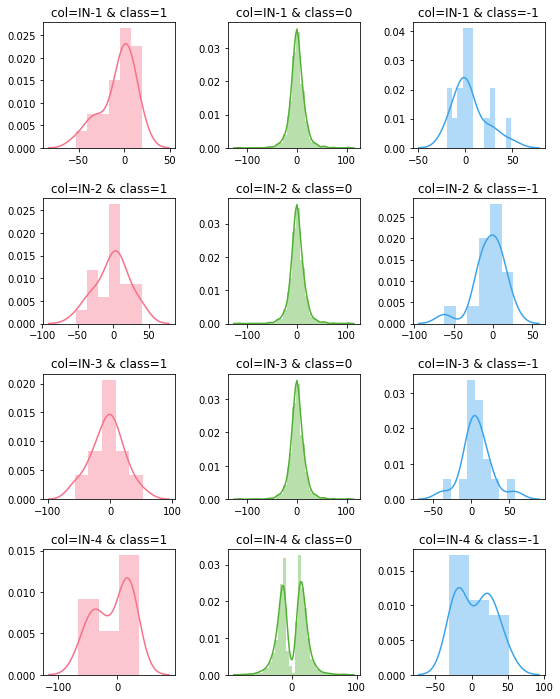

In [7]:
distplots(df, "OUT")

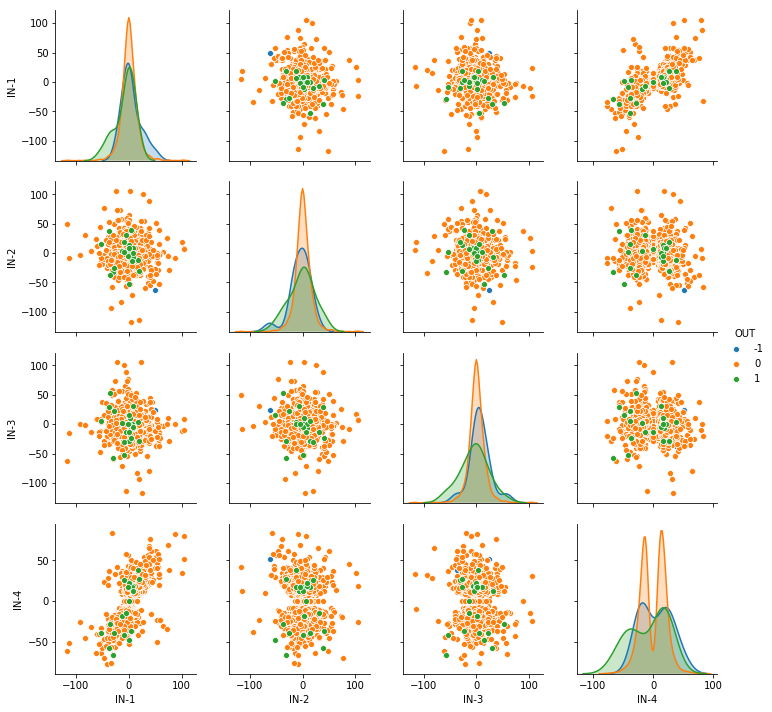

In [8]:
pairplot(df, "OUT")

# 2) Splitting the Dataframe

In [9]:
X_all = df.drop('OUT', axis=1)
Y_all = df['OUT']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_all, Y_all, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(2009, 4)
(503, 4)


In [10]:
num_outliers_train = Y_train.count()
num_outliers_test = Y_test.count()

print("Outlier Distribution:")
print("Train: ", Y_train.sum()/Y_train.count())
print("Test: ", Y_test.sum()/Y_test.count())

Outlier Distribution:
Train:  0.0024888003982080635
Test:  0.0


## Splitting Dataframe equaly

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

for train_index, test_index in sss.split(X_all, Y_all):
    X_train, X_test = X_all.iloc[train_index], X_all.iloc[test_index]
    Y_train, Y_test = Y_all.iloc[train_index], Y_all.iloc[test_index]

In [12]:
num_outliers_train = Y_train.count()
num_outliers_test = Y_test.count()

print("Outlier Distribution:")
print("Train: ", Y_train.sum()/Y_train.count())
print("Test: ", Y_test.sum()/Y_test.count())

Outlier Distribution:
Train:  0.0014932802389248383
Test:  0.003976143141153081


In [13]:
df_train = pd.concat([X_train, Y_train], axis=1, join='outer')
df_train.head()

IN-1  IN-2  IN-3  IN-4  OUT
2148   -11    -7    19   -20    0
693     14     4   -28    29    0
228      0     4    -1    -4    0
2241   -14     7     5   -16    0
651    -13     6   -72   -24    0

In [14]:
df_test = pd.concat([X_test, Y_test], axis=1, join='outer')
df_test.head()

IN-1  IN-2  IN-3  IN-4  OUT
2074   -12     5   -12    -9    0
1019    18     6     3    22    0
1804     0   -36   -37    18    0
308     -4   -11    10    12    0
400      6    17    14     6    0

# 3) Saving the splitted data

In [15]:
df_train.to_csv('data/sample-train.csv', sep=',', index=False)
df_test.to_csv('data/sample-test.csv', sep=',', index=False)